Setup collab

In [1]:
!curl http://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0  17500      0 --:--:-- --:--:-- --:--:-- 17972
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.14)
Already up to date.


Inline charts and ensure libs are reloaded

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Jump straight to the future

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
np.random.seed(2)
bs = 64
# bs = 16

Download and untar bird dataset

In [7]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True)
    Download `url` if doesn't exist to `fname` and un-tgz to folder `dest`



In [24]:
url = 'http://www.vision.caltech.edu/visipedia-data/CUB-200-2011/CUB_200_2011'
path = untar_data(url); path

PosixPath('/root/.fastai/data/CUB_200_2011')

In [36]:
path.ls()

['images',
 'parts',
 'images.txt',
 'train_test_split.txt',
 'bounding_boxes.txt',
 'classes.txt',
 'README',
 'attributes',
 'image_class_labels.txt']

In [37]:
(path/'classes.txt').read_text()

'1 001.Black_footed_Albatross\n2 002.Laysan_Albatross\n3 003.Sooty_Albatross\n4 004.Groove_billed_Ani\n5 005.Crested_Auklet\n6 006.Least_Auklet\n7 007.Parakeet_Auklet\n8 008.Rhinoceros_Auklet\n9 009.Brewer_Blackbird\n10 010.Red_winged_Blackbird\n11 011.Rusty_Blackbird\n12 012.Yellow_headed_Blackbird\n13 013.Bobolink\n14 014.Indigo_Bunting\n15 015.Lazuli_Bunting\n16 016.Painted_Bunting\n17 017.Cardinal\n18 018.Spotted_Catbird\n19 019.Gray_Catbird\n20 020.Yellow_breasted_Chat\n21 021.Eastern_Towhee\n22 022.Chuck_will_Widow\n23 023.Brandt_Cormorant\n24 024.Red_faced_Cormorant\n25 025.Pelagic_Cormorant\n26 026.Bronzed_Cowbird\n27 027.Shiny_Cowbird\n28 028.Brown_Creeper\n29 029.American_Crow\n30 030.Fish_Crow\n31 031.Black_billed_Cuckoo\n32 032.Mangrove_Cuckoo\n33 033.Yellow_billed_Cuckoo\n34 034.Gray_crowned_Rosy_Finch\n35 035.Purple_Finch\n36 036.Northern_Flicker\n37 037.Acadian_Flycatcher\n38 038.Great_Crested_Flycatcher\n39 039.Least_Flycatcher\n40 040.Olive_sided_Flycatcher\n41 041.Sci

In [117]:
path_img = path/'images'
elms = (path/'images.txt').read_text().split('\n')
fnames = [path/('images/'+e.split()[1]) for e in elms[:len(elms)-1]]; fnames[:10]

[PosixPath('/root/.fastai/data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg'),
 PosixPath('/root/.fastai/data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg'),
 PosixPath('/root/.fastai/data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg'),
 PosixPath('/root/.fastai/data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg'),
 PosixPath('/root/.fastai/data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg'),
 PosixPath('/root/.fastai/data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg'),
 PosixPath('/root/.fastai/data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg'),
 PosixPath('/root/.fastai/data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg'),
 PosixPath('/root/.fastai/data/CUB_200_2011/images/001.Black_footed

In [114]:
len(elms), len(paths)

(11789, 11788)

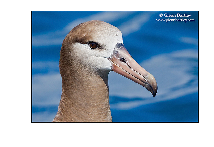

In [115]:
img = open_image(paths[0])
img.show()

In [118]:
help(ImageDataBunch.from_folder)
pat = r'images\/[0-9]+.(.*)\/'

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', test:Union[pathlib.Path, str, NoneType]=None, valid_pct=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs)
data.normalize(imagenet_stats)

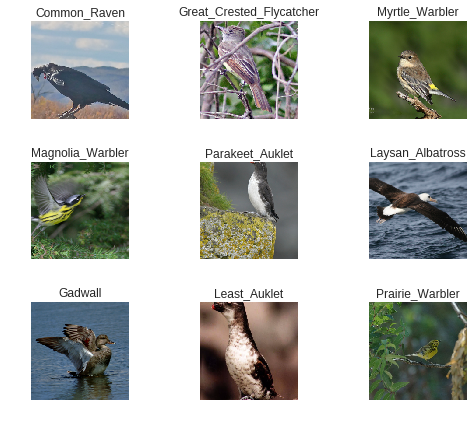

In [120]:
data.show_batch(rows=3, figsize=(7,6))

**Training ResNet-34**

Let's training this dataset using a ResNet convolution neural network with 34 layers, at first we will train for 4 epochs.

In [121]:
print(data.classes)
len(data.classes),data.c

['Black_footed_Albatross', 'Laysan_Albatross', 'Sooty_Albatross', 'Groove_billed_Ani', 'Crested_Auklet', 'Least_Auklet', 'Parakeet_Auklet', 'Rhinoceros_Auklet', 'Brewer_Blackbird', 'Red_winged_Blackbird', 'Rusty_Blackbird', 'Yellow_headed_Blackbird', 'Bobolink', 'Indigo_Bunting', 'Lazuli_Bunting', 'Painted_Bunting', 'Cardinal', 'Spotted_Catbird', 'Gray_Catbird', 'Yellow_breasted_Chat', 'Eastern_Towhee', 'Chuck_will_Widow', 'Brandt_Cormorant', 'Red_faced_Cormorant', 'Pelagic_Cormorant', 'Bronzed_Cowbird', 'Shiny_Cowbird', 'Brown_Creeper', 'American_Crow', 'Fish_Crow', 'Black_billed_Cuckoo', 'Mangrove_Cuckoo', 'Yellow_billed_Cuckoo', 'Gray_crowned_Rosy_Finch', 'Purple_Finch', 'Northern_Flicker', 'Acadian_Flycatcher', 'Great_Crested_Flycatcher', 'Least_Flycatcher', 'Olive_sided_Flycatcher', 'Scissor_tailed_Flycatcher', 'Vermilion_Flycatcher', 'Yellow_bellied_Flycatcher', 'Frigatebird', 'Northern_Fulmar', 'Gadwall', 'American_Goldfinch', 'European_Goldfinch', 'Boat_tailed_Grackle', 'Eared_

(200, 200)

In [0]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [126]:
learn.fit_one_cycle(4)

Total time: 12:08
epoch  train_loss  valid_loss  error_rate
1      3.650673    2.174252    0.521866    (03:07)
2      1.836933    1.261172    0.349438    (03:08)
3      1.250030    1.025832    0.284881    (02:55)
4      0.989510    0.987043    0.269888    (02:57)



In [0]:
learn.save('stage-1')

**Results**

Let's analyse what the molde had learned, namely:

*   Check if the model prediction were reasonable or not
*   ***Confusion matrix***: distribution of predicted categories for each category and what are the ones that confused our model the most.



In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [135]:
help(interp.plot_top_losses)

Help on method plot_top_losses in module fastai.vision.learner:

plot_top_losses(k, largest=True, figsize=(12, 12)) method of fastai.vision.learner.ClassificationInterpretation instance
    Show images in `top_losses` along with their loss, label, and prediction.



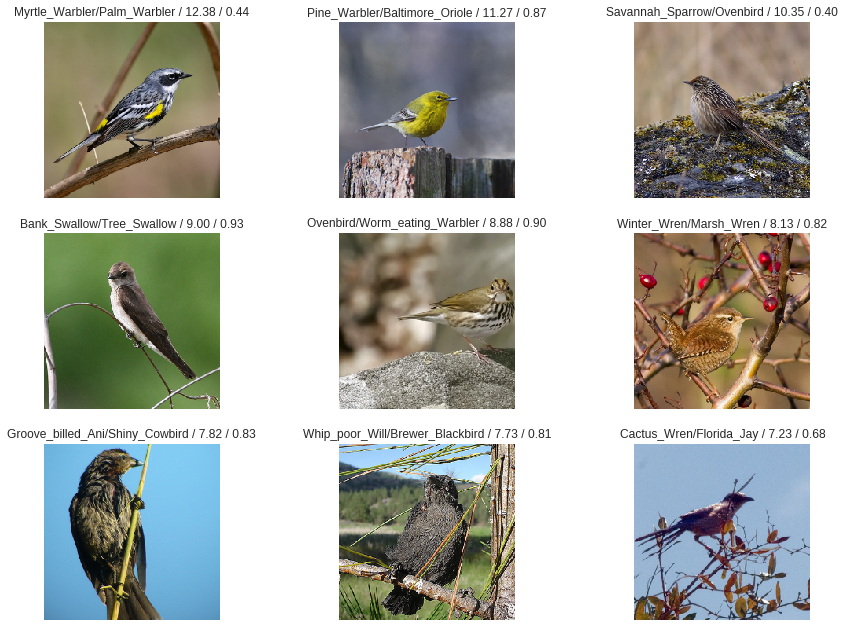

In [129]:
interp.plot_top_losses(9, figsize=(15,11))

In [134]:
help(interp.plot_confusion_matrix)

Help on method plot_confusion_matrix in module fastai.vision.learner:

plot_confusion_matrix(normalize:bool=False, title:str='Confusion matrix', cmap:Any='Blues', **kwargs) -> None method of fastai.vision.learner.ClassificationInterpretation instance
    Plot the confusion matrix, passing `kawrgs` to `plt.figure`.



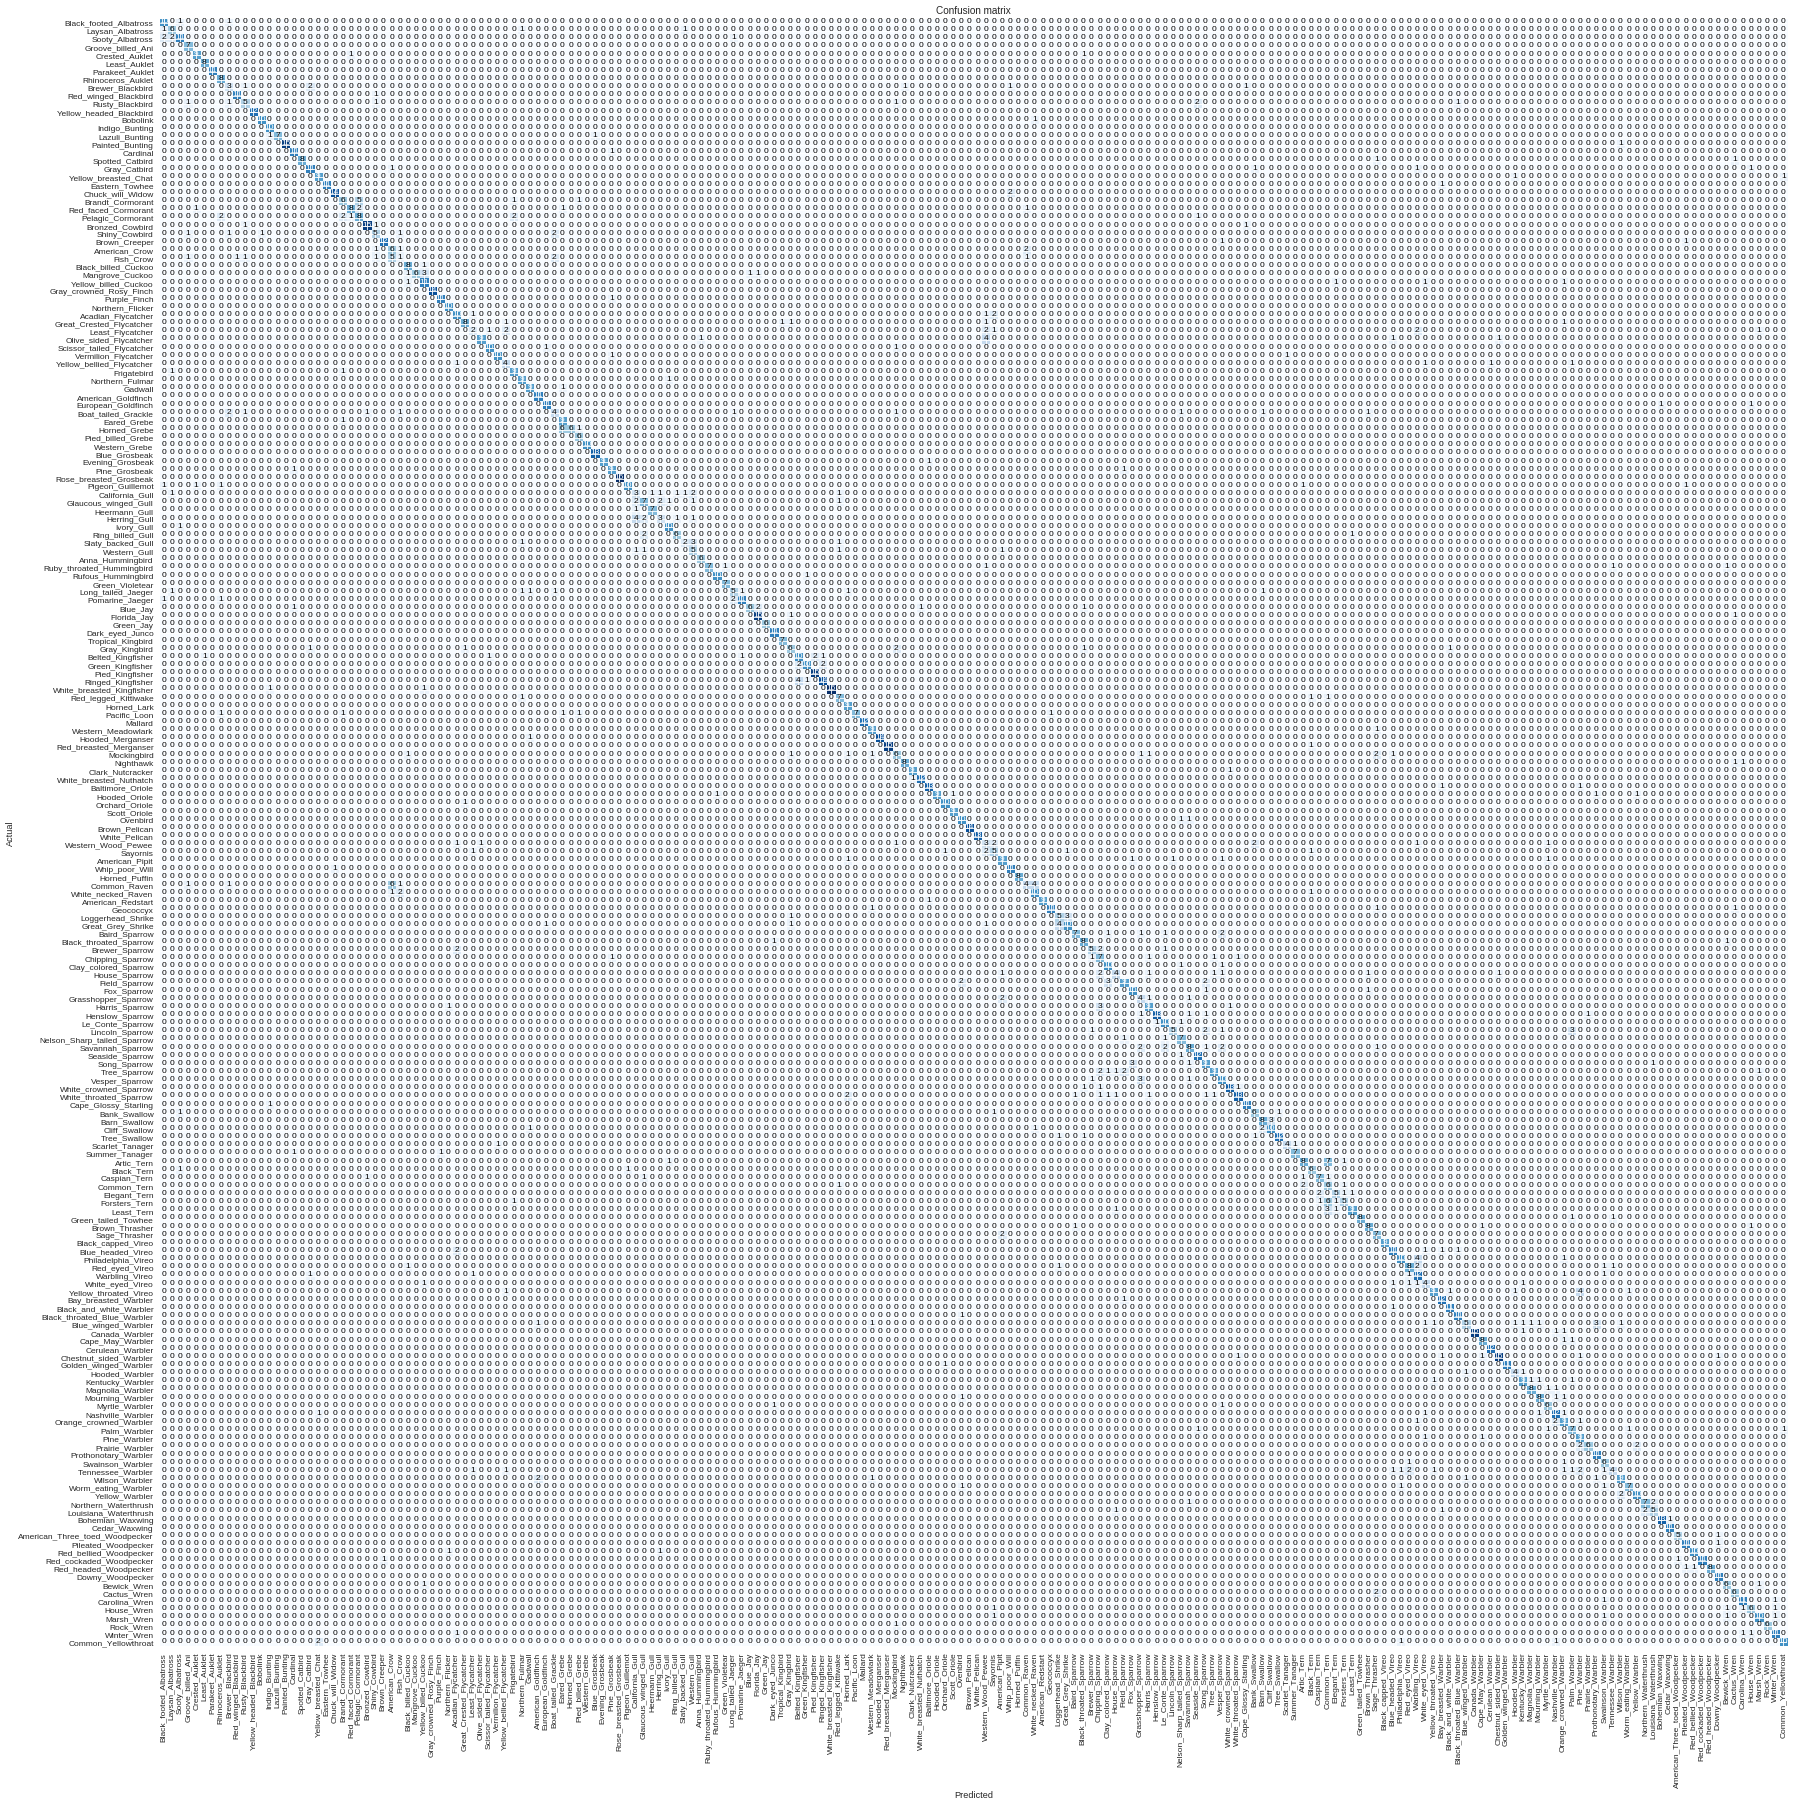

In [137]:
interp.plot_confusion_matrix(figsize=(30,30), dpi=60)

**Fine tunning and further training**

Let's unfreeze the model, try to fine tun it and trainined for more cycles.

In [0]:
learn.unfreeze()

In [140]:
learn.fit_one_cycle(1)

Total time: 03:08
epoch  train_loss  valid_loss  error_rate
1      2.061646    1.430330    0.399000    (03:08)



The loss is exploding!

In [0]:
learn.load('stage-1')

In [142]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


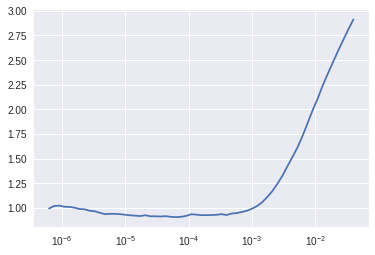

In [144]:
learn.recorder.plot()

In [148]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-3))

Total time: 15:53
epoch  train_loss  valid_loss  error_rate
1      0.934940    0.992323    0.272387    (03:05)
2      0.954702    0.971528    0.269888    (03:11)
3      0.724628    0.816992    0.228238    (03:08)
4      0.502529    0.767368    0.215327    (03:08)
5      0.390407    0.743022    0.202416    (03:19)



**Training: RestNet-50**

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=bs//2)
data.normalize(imagenet_stats)

In [150]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)
learn.fit_one_cycle(8, max_lr=slice(1e-5, 1e-3))

Total time: 45:28
epoch  train_loss  valid_loss  error_rate
1      4.096893    3.194310    0.648615    (06:00)
2      2.347174    1.657147    0.381612    (05:35)
3      1.543579    1.087344    0.280856    (05:35)
4      1.125449    0.910904    0.246432    (05:45)
5      0.911312    0.819096    0.222502    (05:34)
6      0.758554    0.772480    0.216205    (05:35)
7      0.629196    0.738204    0.204870    (05:47)
8      0.543237    0.731318    0.201511    (05:33)



In [0]:
learn.save('stage-1-50')

Let's train for more epoch

In [152]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-5, 1e-3))

Total time: 21:29
epoch  train_loss  valid_loss  error_rate
1      0.880052    0.975944    0.270781    (07:15)
2      0.692616    0.665279    0.189337    (07:06)
3      0.349218    0.595561    0.171285    (07:07)



In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [154]:
interp.most_confused(min_val=2)

[('Great_Grey_Shrike', 'Loggerhead_Shrike', 10),
 ('Long_tailed_Jaeger', 'Pomarine_Jaeger', 7),
 ('Brandt_Cormorant', 'Pelagic_Cormorant', 6),
 ('Eared_Grebe', 'Horned_Grebe', 4),
 ('Herring_Gull', 'California_Gull', 4),
 ('Slaty_backed_Gull', 'Western_Gull', 4),
 ('Pomarine_Jaeger', 'Long_tailed_Jaeger', 4),
 ('Common_Tern', 'Artic_Tern', 4),
 ('Brewer_Blackbird', 'Boat_tailed_Grackle', 3),
 ('American_Crow', 'Fish_Crow', 3),
 ('Least_Flycatcher', 'Western_Wood_Pewee', 3),
 ('Northern_Fulmar', 'Black_footed_Albatross', 3),
 ('California_Gull', 'Herring_Gull', 3),
 ('California_Gull', 'Ring_billed_Gull', 3),
 ('Ring_billed_Gull', 'Glaucous_winged_Gull', 3),
 ('Mallard', 'Gadwall', 3),
 ('Common_Raven', 'Fish_Crow', 3),
 ('Nelson_Sharp_tailed_Sparrow', 'Le_Conte_Sparrow', 3),
 ('Savannah_Sparrow', 'Vesper_Sparrow', 3),
 ('Cliff_Swallow', 'Barn_Swallow', 3),
 ('Artic_Tern', 'Common_Tern', 3),
 ('Caspian_Tern', 'Common_Tern', 3),
 ('Common_Tern', 'Forsters_Tern', 3),
 ('Hooded_Warbler', '